In [17]:
import pandas as pd

file_path = "../dataset/5_class_10_12_2025.csv"

df = pd.read_csv(file_path, quotechar='"')

print("--- Preview ---")
display(df.head())

print("\n--- Data Info ---")
print(df.info())
print("\n--- Data Description ---")
print(df.describe())

--- Preview ---


,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I40972,002_S_0295,CN,M,85,m06,MRI,MPR-R; GradWarp; B1 Correction,Pre-processed,11/02/2006,NiFTI,Yes
1,I40973,002_S_0295,CN,M,85,m06,MRI,MPR-R; GradWarp,Pre-processed,11/02/2006,NiFTI,Yes
2,I42843,033_S_1116,MCI,M,83,sc,MRI,MPR; GradWarp; B1 Correction; N3,Pre-processed,11/21/2006,NiFTI,Yes
3,I42846,033_S_1116,MCI,M,83,sc,MRI,MPR; GradWarp,Pre-processed,11/21/2006,NiFTI,Yes
4,I45110,002_S_0295,CN,M,85,sc,MRI,MPR; GradWarp,Pre-processed,4/18/2006,NiFTI,Yes



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Image Data ID  205 non-null    object
 1   Subject        205 non-null    object
 2   Group          205 non-null    object
 3   Sex            205 non-null    object
 4   Age            205 non-null    int64 
 5   Visit          205 non-null    object
 6   Modality       205 non-null    object
 7   Description    205 non-null    object
 8   Type           205 non-null    object
 9   Acq Date       205 non-null    object
 10  Format         205 non-null    object
 11  Downloaded     205 non-null    object
dtypes: int64(1), object(11)
memory usage: 19.3+ KB
None

--- Data Description ---
              Age
count  205.000000
mean    77.063415
std      6.940283
min     60.000000
25%     72.000000
50%     78.000000
75%     82.000000
max     91.000000



--- 各分类样本数量 ---
Group
CN      52
MCI     50
AD      50
LMCI    29
EMCI    24
Name: count, dtype: int64

--- 年龄统计 ---
平均年龄: 77.06
最小/最大年龄: 60 / 91

--- 性别统计 ---
Sex
M    133
F     72
Name: count, dtype: int64


/tmp/ipykernel_1434271/1477788370.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Group', data=df, ax=axes[0, 0], palette='viridis', order=group_counts.index)
/tmp/ipykernel_1434271/1477788370.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Age', data=df, ax=axes[1, 1], palette='Set3', order=group_counts.index)


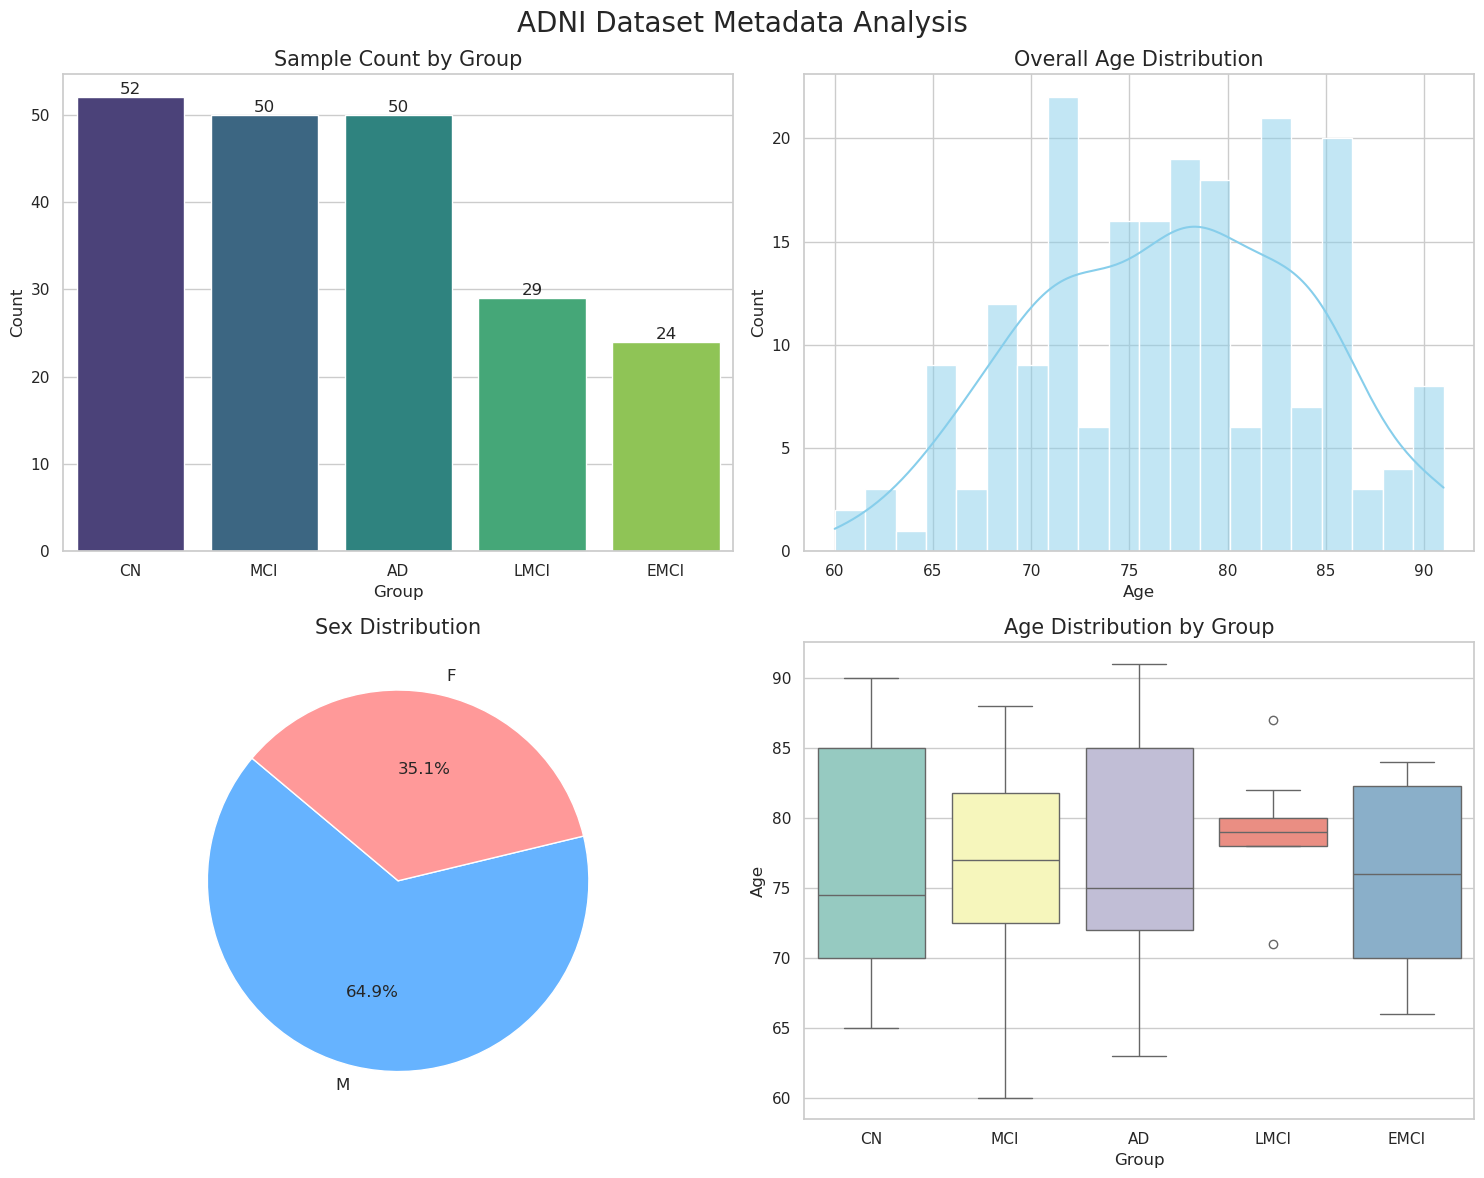

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(file_path, quotechar='"')

sns.set(style="whitegrid")

# 创建一个画布，包含 2 行 2 列的子图
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('ADNI Dataset Metadata Analysis', fontsize=20)

# -------------------------------------------------------
# 图表 1: 五个分类的样本数量 (柱状图)
# -------------------------------------------------------
# 统计每个组的数量
group_counts = df['Group'].value_counts()
print("\n--- 各分类样本数量 ---")
print(group_counts)

sns.countplot(x='Group', data=df, ax=axes[0, 0], palette='viridis', order=group_counts.index)
axes[0, 0].set_title('Sample Count by Group', fontsize=15)
axes[0, 0].set_xlabel('Group')
axes[0, 0].set_ylabel('Count')
# 在柱子上显示具体数值
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container)

# -------------------------------------------------------
# 图表 2: 年龄分布 (直方图 + KDE)
# -------------------------------------------------------
sns.histplot(data=df, x='Age', kde=True, ax=axes[0, 1], color='skyblue', bins=20)
axes[0, 1].set_title('Overall Age Distribution', fontsize=15)
axes[0, 1].set_xlabel('Age')

print(f"\n--- 年龄统计 ---")
print(f"平均年龄: {df['Age'].mean():.2f}")
print(f"最小/最大年龄: {df['Age'].min()} / {df['Age'].max()}")

# -------------------------------------------------------
# 图表 3: 性别比例 (饼图)
# -------------------------------------------------------
sex_counts = df['Sex'].value_counts()
print("\n--- 性别统计 ---")
print(sex_counts)

axes[1, 0].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', 
                startangle=140, colors=['#66b3ff','#ff9999'], textprops={'fontsize': 12})
axes[1, 0].set_title('Sex Distribution', fontsize=15)

# -------------------------------------------------------
# 图表 4 (进阶): 不同分组的年龄分布 (箱线图)
# -------------------------------------------------------
# 这能帮你看出不同疾病阶段的人群年龄是否有显著差异
sns.boxplot(x='Group', y='Age', data=df, ax=axes[1, 1], palette='Set3', order=group_counts.index)
axes[1, 1].set_title('Age Distribution by Group', fontsize=15)

plt.tight_layout()
plt.show()


尝试加载文件: /data/qiuyk/workshop/lab/biai/final/dataset/ADNI/ADNI/002_S_0782/HHP_6_DOF_AC-PC_registered_MPRAGE/2006-08-14_09_39_47.0/I387728/ADNI_002_S_0782_MR_HHP_6_DOF_AC-PC_registered_MPRAGE_Br_20130828093308986_S17835_I387728.nii
文件加载成功。图像头信息:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='>'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'002_S_0782')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 197 233 189   0   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 1. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin         

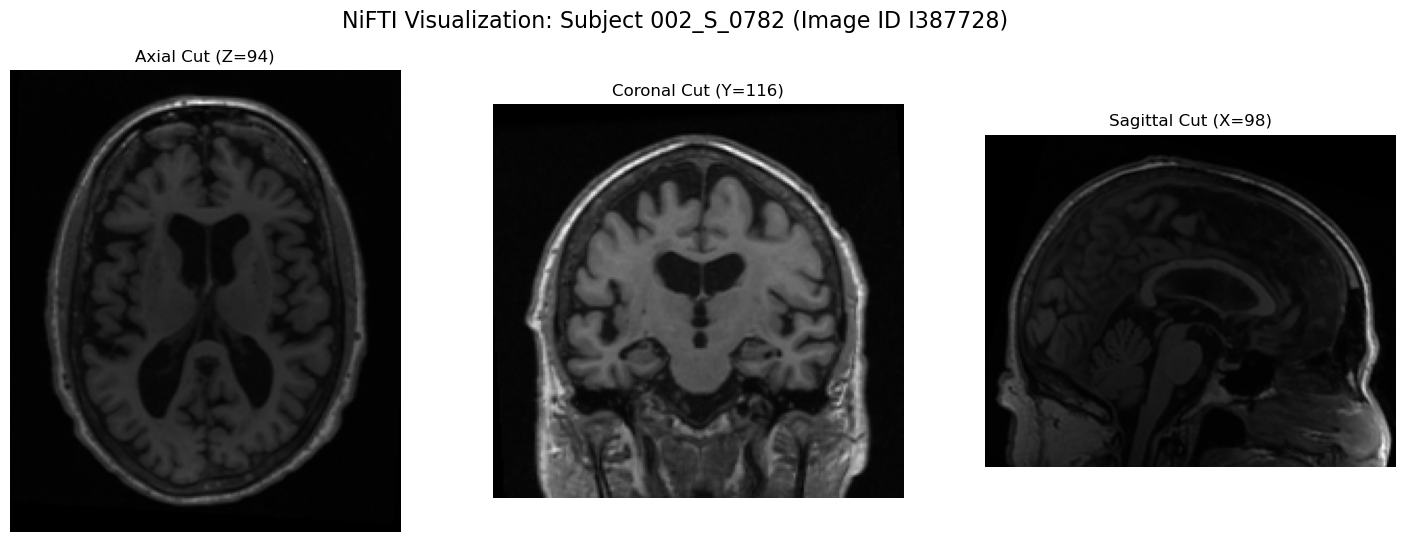

In [15]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os

# ==========================================
# 您提供的完整文件路径
nifti_file_path = '/data/qiuyk/workshop/lab/biai/final/dataset/ADNI/ADNI/002_S_0782/HHP_6_DOF_AC-PC_registered_MPRAGE/2006-08-14_09_39_47.0/I387728/ADNI_002_S_0782_MR_HHP_6_DOF_AC-PC_registered_MPRAGE_Br_20130828093308986_S17835_I387728.nii'
# ==========================================

print(f"尝试加载文件: {nifti_file_path}")


# 1. 使用 NiBabel 加载 NiFTI 文件
img = nib.load(nifti_file_path)
print("文件加载成功。图像头信息:")
print(img.header)

data = img.get_fdata()

print("\n--- 文件加载成功 ---")
print(f"受试者 ID: 002_S_0782")
print(f"图像尺寸 (X, Y, Z): {data.shape}")
print(f"数据最小值/最大值: {data.min():.2f} / {data.max():.2f}")

# 2. 确定三个轴的中点切片索引
x_center = data.shape[0] // 2
y_center = data.shape[1] // 2
z_center = data.shape[2] // 2

# 3. 可视化三个正交切片
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(f'NiFTI Visualization: Subject 002_S_0782 (Image ID I387728)', fontsize=16)

# 轴位 (Axial, Z 轴)
axes[0].imshow(data[:, :, z_center].T, cmap='gray', origin='lower')
axes[0].set_title(f'Axial Cut (Z={z_center})')
axes[0].axis('off')

# 冠状位 (Coronal, Y 轴)
axes[1].imshow(data[:, y_center, :].T, cmap='gray', origin='lower')
axes[1].set_title(f'Coronal Cut (Y={y_center})')
axes[1].axis('off')

# 矢状位 (Sagittal, X 轴)
axes[2].imshow(data[x_center, :, :].T, cmap='gray', origin='lower')
axes[2].set_title(f'Sagittal Cut (X={x_center})')
axes[2].axis('off')

plt.show()


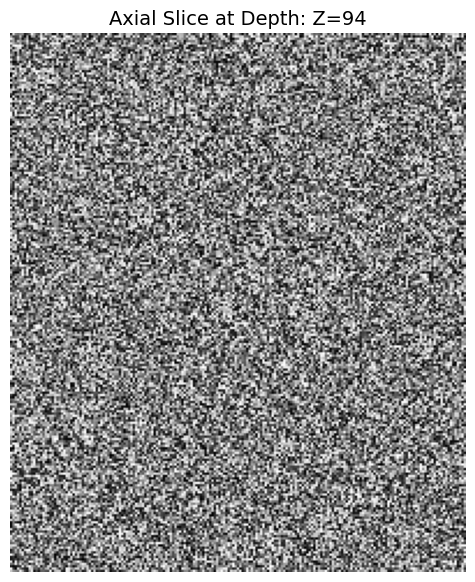

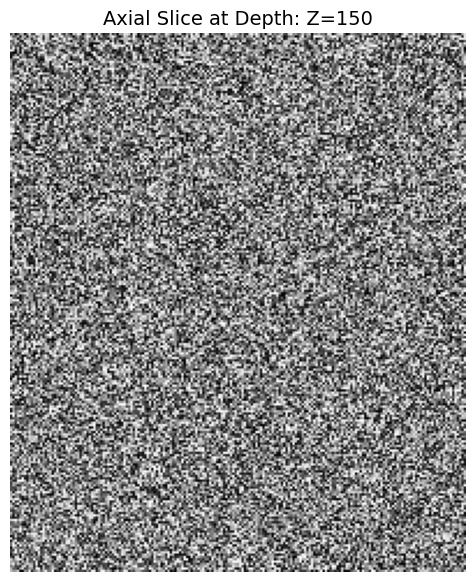

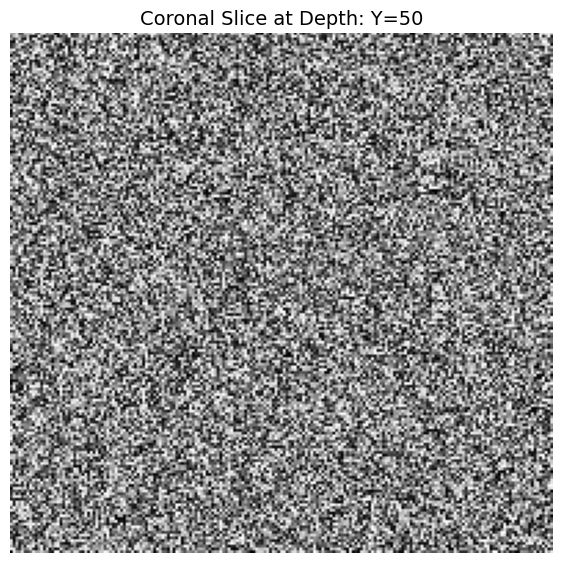

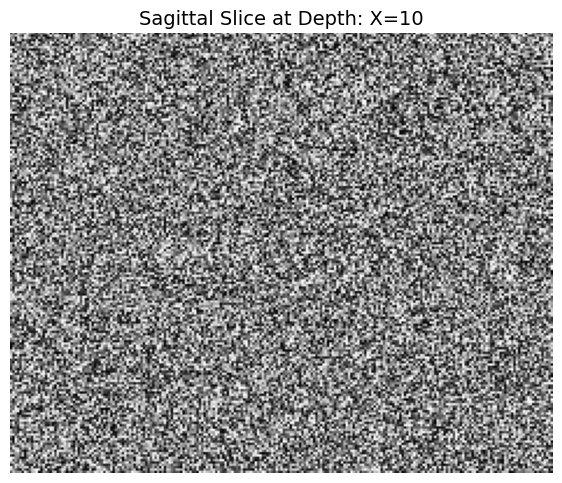